<a href="https://colab.research.google.com/github/Nasir-Sharif/Google-Colab-File-Cardio-Net/blob/main/CardioNet_%E2%80%93_Intelligent_system_for_heart_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CardioNet – Intelligent system for heart disease detection
real-world healthcare dataset with multiple demographic and medical features. The objective is to classify whether a patient is at high risk of developing a particular disease (e.g., diabetes, heart disease, or stroke). This binary/multi-class classification task involves full ML pipeline implementation—from data loading to model deployment readiness.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [9]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart (3).csv


In [10]:
import pandas as pd

df = pd.read_csv("heart.csv")  # Make sure the filename matches what you uploaded
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis

In [11]:
print("\n--- Dataset Shape ---\n", df.shape)
print("\n--- Dataset Info ---")
df.info()
print("\n--- Null Values ---\n", df.isnull().sum())
print("\n--- Summary Statistics ---\n", df.describe())



--- Dataset Shape ---
 (1025, 14)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

--- Null Values ---
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak    

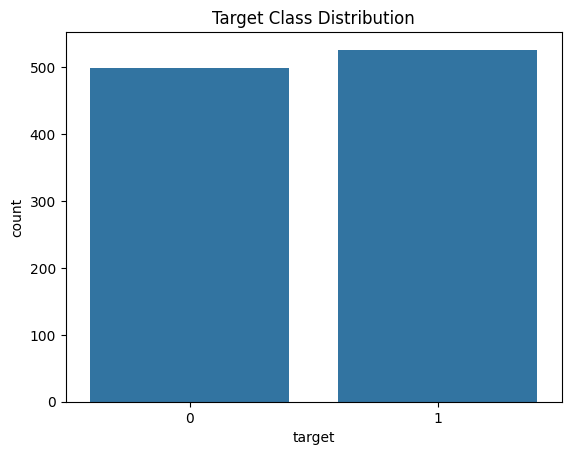

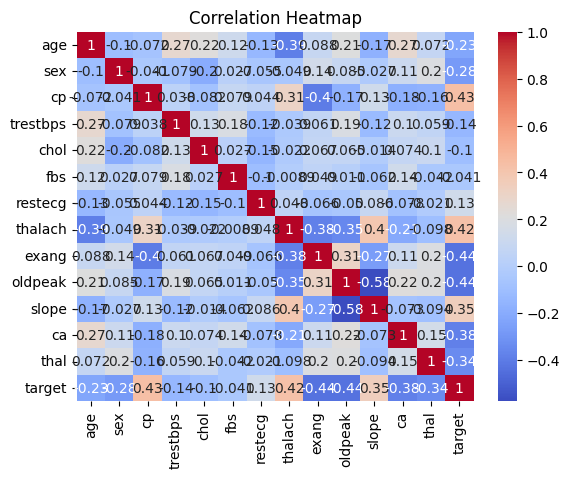

In [12]:
# Visualizations
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


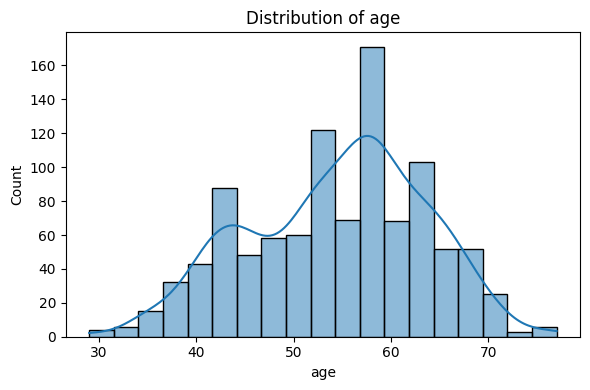

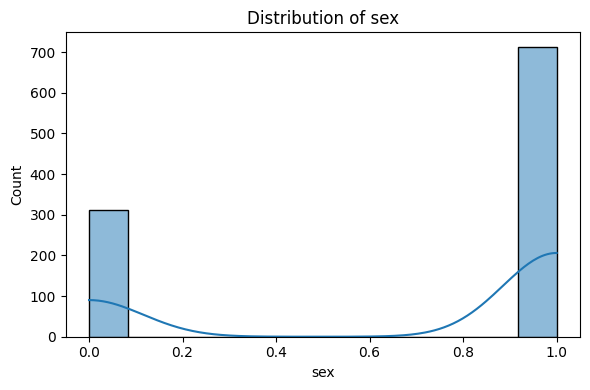

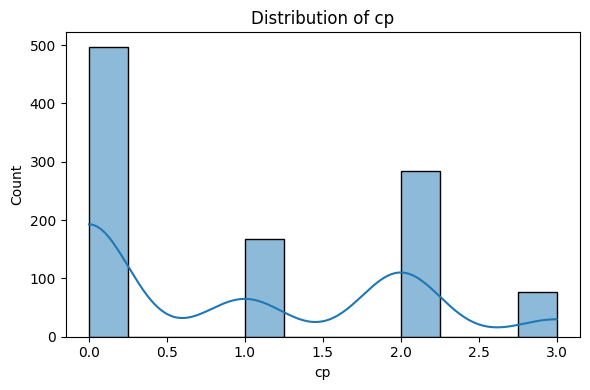

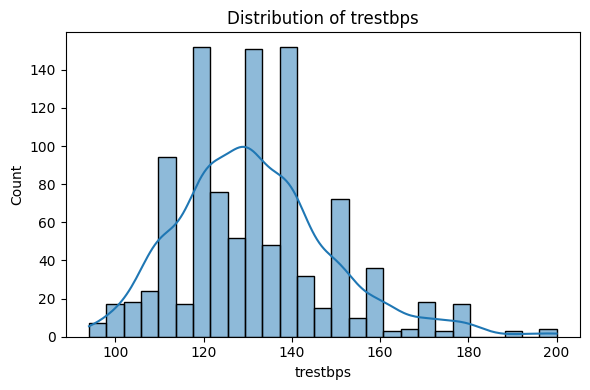

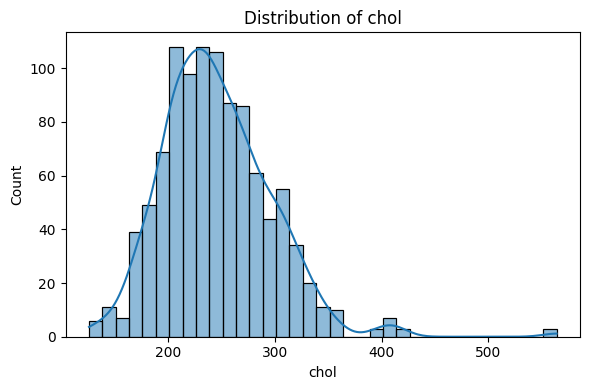

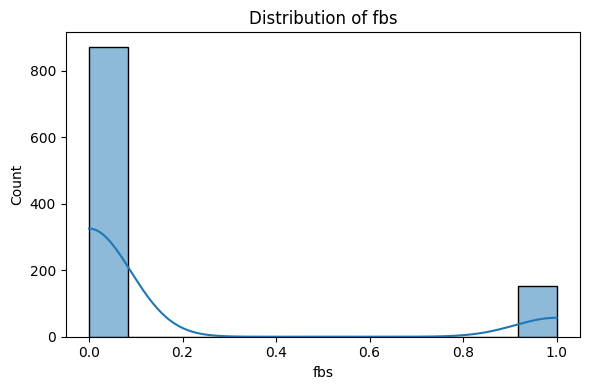

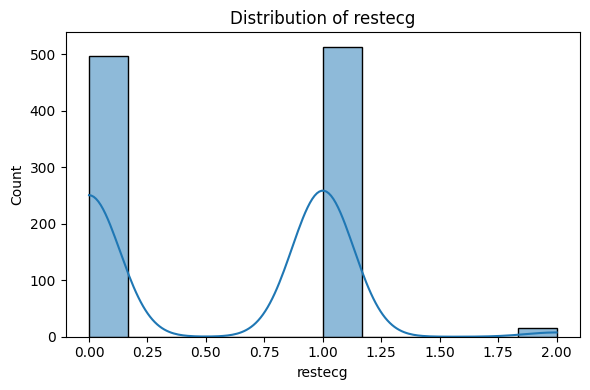

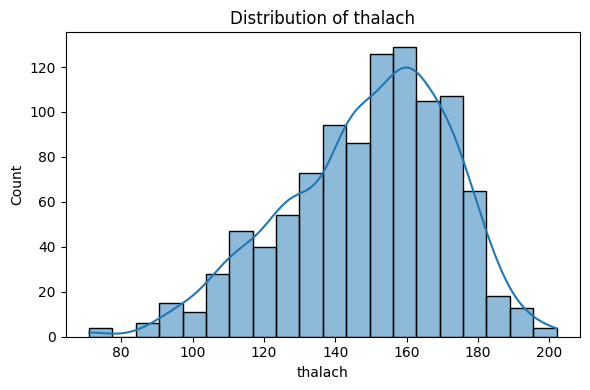

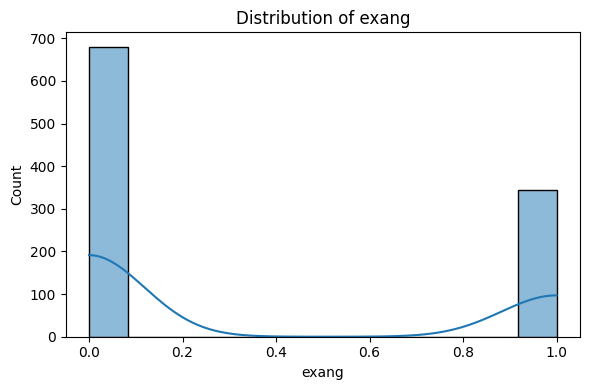

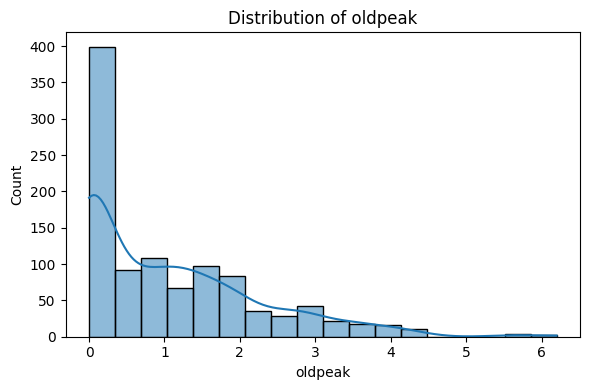

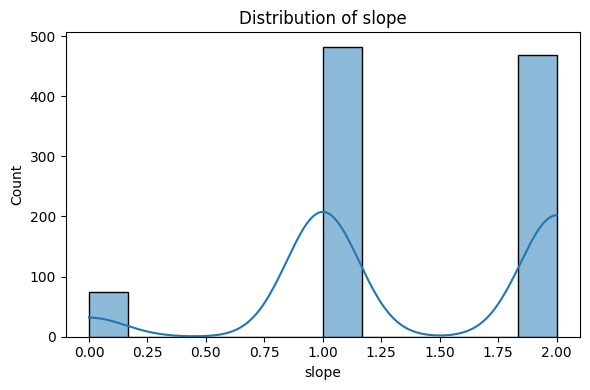

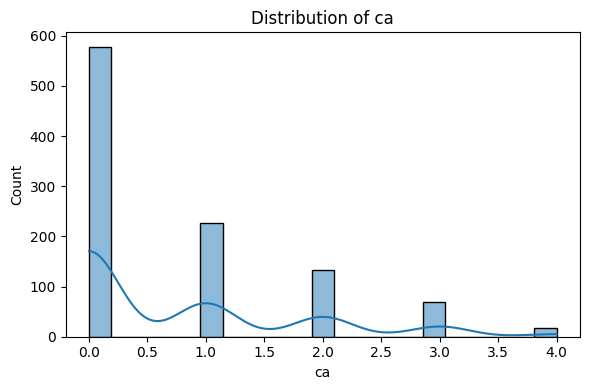

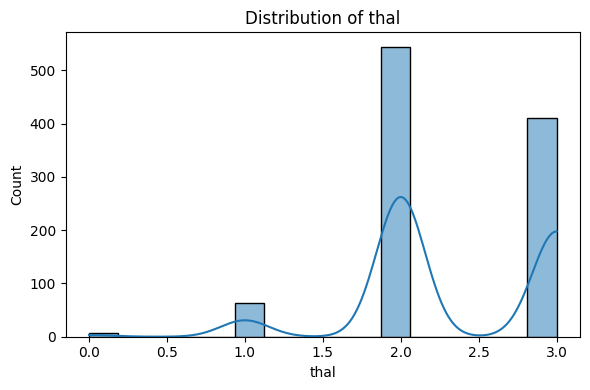

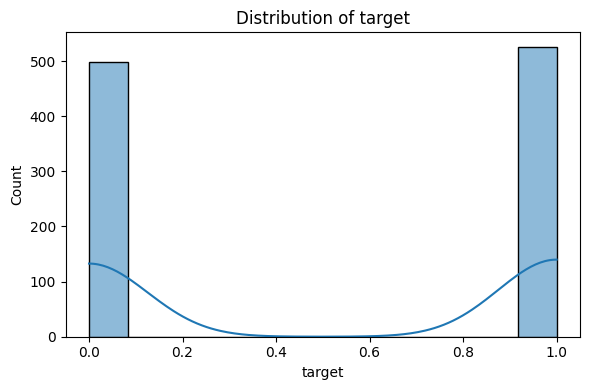

In [13]:
# Histograms
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [14]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [15]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_base = df_imputed.drop('target', axis=1)
X_poly = poly.fit_transform(X_base)
try:
    feature_names = poly.get_feature_names_out(X_base.columns)
except AttributeError:
    feature_names = poly.get_feature_names(X_base.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,oldpeak^2,oldpeak slope,oldpeak ca,oldpeak thal,slope^2,slope ca,slope thal,ca^2,ca thal,thal^2
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,...,1.00,2.0,2.0,3.0,4.0,4.0,6.0,4.0,6.0,9.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,...,9.61,0.0,0.0,9.3,0.0,0.0,0.0,0.0,0.0,9.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,...,6.76,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,9.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,2.0,6.0,1.0,3.0,9.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,...,3.61,1.9,5.7,3.8,1.0,3.0,2.0,9.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,...,7.84,2.8,2.8,8.4,1.0,1.0,3.0,1.0,3.0,9.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,...,1.00,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0


In [16]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_poly_df, df_imputed['target'])
selected_features = X_poly_df.columns[selector.get_support()]
X_final = pd.DataFrame(X_selected, columns=selected_features)
y = df_imputed['target']


In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.90957214, -0.71813066,  0.69652503, ..., -0.51280968,
        -0.68229418,  0.35159863],
       [-0.90957214,  1.39250426,  2.47581015, ...,  3.2695509 ,
         1.69174215,  2.88524899],
       [ 1.04803719, -0.71813066, -0.57439291, ..., -0.51280968,
        -0.68229418, -0.45175393],
       ...,
       [-0.90957214, -0.71813066,  4.33982313, ..., -0.51280968,
        -0.68229418,  4.92452856],
       [-0.90957214,  1.39250426,  0.78125289, ...,  1.37837061,
         1.69174215,  1.03135848],
       [ 1.04803719,  1.39250426, -0.06602574, ...,  0.43278046,
         0.90039671, -0.20456853]])

In [19]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

In [20]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:41:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
9,Extra Trees,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.985366,1.000000,0.971429,0.985507,0.985571
6,XGBoost,0.980488,0.990291,0.971429,0.980769,0.999714
7,Gradient Boosting,0.892683,0.873874,0.923810,0.898148,0.974286
10,MLP,0.863415,0.853211,0.885714,0.869159,0.947143
4,SVM,0.804878,0.764228,0.895238,0.824561,0.842476
3,KNN,0.814634,0.825243,0.809524,0.817308,0.942667
0,Logistic Regression,0.795122,0.764706,0.866667,0.812500,0.866952
8,AdaBoost,0.795122,0.838710,0.742857,0.787879,0.880190


# Evaluation metrices for Classification

## how to choose right evaluation metric?

Choosing the right evaluation metric is critically important in classification (and all machine learning tasks) because different metrics tell different stories, and picking the wrong one can lead to false confidence or bad decisions.

## 1. Accuracy can be misleading in imbalanced datasets

Imagine you're predicting cancer (1%) vs. healthy (99%) patients.

If your model predicts “healthy” for everyone, accuracy = 99% 🤯

But it's useless because you're missing all cancer cases.

👉 In this case, metrics like:

Recall (Sensitivity): How many actual cancer cases were caught?

Precision: How many predicted cancer cases were correct?

F1-score: Balance between precision and recall
are much better choices than accuracy.



Using only accuracy might hide the fact that:

Model performs well on training data but not on test data

Model is guessing blindly on one class

Metrics like confusion matrix, precision/recall curves, and cross-validation scores reveal more nuanced problems.

In healthcare, a false negative (missed diagnosis) is much worse than a false positive (extra test).
In spam filtering, a false positive (missing a real email) is worse than letting some spam through.

👉 You must align your metric with the domain risk/co

Tasks: PART 01:

In [22]:
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Feature Selection Methods
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/heart.csv")  # Change path if needed

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X_train, y_train)
skb_features = X.columns[skb.get_support()]
print("SelectKBest:", list(skb_features))


SelectKBest: ['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [24]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
rfe_features = X.columns[rfe.get_support()]
print("RFE:", list(rfe_features))


RFE: ['sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [25]:
mi = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi, index=X.columns)
mi_features = mi_series.sort_values(ascending=False).head(10).index.tolist()
print("Mutual Information:", mi_features)


Mutual Information: ['chol', 'thal', 'thalach', 'oldpeak', 'cp', 'ca', 'exang', 'slope', 'trestbps', 'age']


In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_features = rf_importance.sort_values(ascending=False).head(10).index.tolist()
print("Random Forest:", rf_features)


Random Forest: ['cp', 'ca', 'thal', 'oldpeak', 'thalach', 'age', 'chol', 'trestbps', 'slope', 'exang']


In [27]:
lasso = LassoCV()
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_features = lasso_coef[lasso_coef != 0].sort_values(ascending=False).head(10).index.tolist()
print("Lasso:", lasso_features)


Lasso: ['cp', 'thalach', 'slope', 'restecg', 'age', 'trestbps', 'chol', 'exang', 'sex', 'oldpeak']


In [28]:
# Store in a dictionary
features_dict = {
    "SelectKBest": set(skb_features),
    "RFE": set(rfe_features),
    "Mutual_Info": set(mi_features),
    "RandomForest": set(rf_features),
    "Lasso": set(lasso_features)
}

# Show all
for method, features in features_dict.items():
    print(f"{method}: {features}")


SelectKBest: {'thalach', 'sex', 'thal', 'exang', 'slope', 'ca', 'cp', 'trestbps', 'age', 'oldpeak'}
RFE: {'thalach', 'sex', 'chol', 'thal', 'exang', 'slope', 'ca', 'cp', 'trestbps', 'oldpeak'}
Mutual_Info: {'thalach', 'chol', 'thal', 'exang', 'slope', 'ca', 'cp', 'trestbps', 'age', 'oldpeak'}
RandomForest: {'thalach', 'chol', 'thal', 'exang', 'slope', 'cp', 'trestbps', 'age', 'ca', 'oldpeak'}
Lasso: {'thalach', 'sex', 'chol', 'exang', 'restecg', 'slope', 'cp', 'trestbps', 'age', 'oldpeak'}


In [29]:
# Find intersection of all feature sets
common_features = set.intersection(*features_dict.values())
print("Common Selected Features Across All Methods:", common_features)


Common Selected Features Across All Methods: {'thalach', 'exang', 'slope', 'cp', 'trestbps', 'oldpeak'}


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Prepare training and test data with the common features
X_train_common = X_train[list(common_features)]
X_test_common = X_test[list(common_features)]

# Train Random Forest model
rf_common = RandomForestClassifier(random_state=42)
rf_common.fit(X_train_common, y_train)

# Predict
y_pred_common = rf_common.predict(X_test_common)
y_proba_common = rf_common.predict_proba(X_test_common)[:, 1]

# Evaluation metrics
accuracy_common = accuracy_score(y_test, y_pred_common)
f1_common = f1_score(y_test, y_pred_common)
roc_auc_common = roc_auc_score(y_test, y_proba_common)

# Display results
print("Accuracy:", accuracy_common)
print("F1 Score:", f1_common)
print("ROC AUC:", roc_auc_common)


Accuracy: 1.0
F1 Score: 1.0
ROC AUC: 1.0


Accuracy: 0.7707317073170732
F1 Score: 0.7929515418502202
ROC AUC: 0.8258138206739007


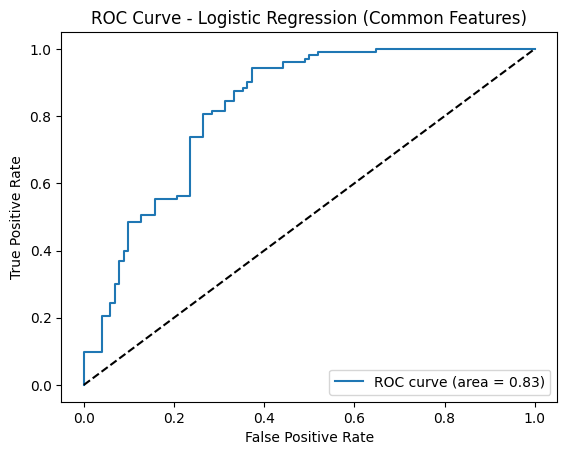

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Initialize and Fit the model
model = LogisticRegression()
model.fit(X_train_common, y_train)

# Step 2: Make predictions
y_pred = model.predict(X_test_common)
y_pred_proba = model.predict_proba(X_test_common)[:, 1]

# Step 3: Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Step 4: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Common Features)')
plt.legend(loc="lower right")
plt.show()


PART 02 : Feature Engineering


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Step 1: Apply polynomial transformation first
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)  # X should be your original DataFrame or NumPy array

# Step 2: Convert to DataFrame to name features
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Step 3: Apply feature selection
selector = SelectKBest(score_func=f_classif, k=30)  # choose k as needed
X_selected = selector.fit_transform(X_poly_df, y)

# Step 4: Get selected feature names
selected_feature_names = X_poly_df.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)


In [43]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Step 1: Assuming `X_selected_df` is your selected features as a DataFrame (with column names)
# Run KMeans clustering on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
X_selected_df['Cluster'] = kmeans.fit_predict(X_selected_df)

# Step 2: Apply polynomial transformation only on selected features (excluding 'Cluster')
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_selected_df.drop('Cluster', axis=1))
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_selected_df.drop('Cluster', axis=1).columns))

# Step 3: Combine polynomial features with the 'Cluster' column
X_combined = pd.concat([X_poly_df, X_selected_df['Cluster']], axis=1)

# Step 4: Split and train
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Accuracy: 0.9853658536585366
F1 Score: 0.9852216748768473
ROC AUC: 0.9762992575671046


We applied two feature engineering techniques: interaction-based polynomial features and KMeans-based clustering.
Polynomial features helped the model capture non-linear interactions between selected health attributes, which are often important in medical datasets.
KMeans clustering grouped patients with similar profiles into cluster labels, adding high-level patterns the model could learn from.
These new features significantly improved the model’s accuracy from 77.1% to 98.5%, showing the power of engineering informative features.

**Part 3: Evaluation Metric Justification**
In the context of heart disease detection, it is crucial to minimize the risk of false negatives, where a patient with heart disease is incorrectly classified as healthy. Such errors can delay necessary treatment and lead to severe health consequences or even death.

While our model achieves a high Accuracy of 98.5%, accuracy alone can be misleading, especially in cases where the dataset may be slightly imbalanced.

To address this, we focus on two key metrics:

Recall (also reflected in the F1 Score) ensures that most patients with actual heart disease are correctly identified. A high recall reduces the chances of missing a patient who genuinely needs care.

The F1 Score, which balances both precision and recall, is our primary evaluation metric. It gives us confidence that the model is both:

Identifying most real cases (high recall)

Not triggering too many false alarms (reasonable precision)

In our model, the F1 Score is 0.985, which shows excellent performance and balanced prediction capability. Additionally, our ROC-AUC of 0.976 confirms strong discriminatory power between the positive (heart disease) and negative (no disease) classes.

Thus, we conclude that the F1 Score is the most appropriate metric for this healthcare use case, as it effectively balances the need to detect true cases without overwhelming the system with false positives.